## Leveraging Machine Learning Approaches for Diabetes Prediction and Analysis

This project aims to provide answers to the below research questions

i. Model Performance Comparison: How do Random Forest, XGBoost, and Support Vector Machines (SVM) compare in their predictive performance for diabetes progression?

ii. Exploratory Data Insights: What insights, trends, or patterns can be uncovered through Exploratory Data Analysis (EDA) in relation to diabetes progression?



## About the Dataset
The dataset consists of 22 variables

1.BMI: Continuous variable reflecting the individual's body mass index.

2.MentHlth: Number of days in the past 30 days when mental health was not good.

3.PhysHlth: Number of days in the past 30 days when physical health was not good.

4.Age: Age of the individual in years.

5.Education: Ordinal variable representing education level (1 = Never attended school, increasing levels of education).

6.Income: Ordinal variable representing income levels (1 = Less than $10,000, increasing levels of income).

7.GenHlth: Self-reported general health status (1 = Excellent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor).

8.NoDocbcCost: Frequency-based numerical indication of cost-related healthcare inaccessibility.

9.Diabetes_binary: Binary variable (1 for Diabetes, 0 for No Diabetes)

10.HighBP: Binary variable indicating high blood pressure (1 for Yes, 0 for No)

11.HighChol: Binary variable indicating high cholesterol (1 for Yes, 0 for No)

12.CholCheck: Binary variable indicating cholesterol check in the past five years (1 for Yes, 0 for No).

13.Smoker: Binary variable indicating smoking history (1 for Smoker, 0 for Non-Smoker).

14.Stroke: Binary variable indicating history of stroke (1 for Yes, 0 for No).

15.HeartDiseaseorAttack: Binary variable indicating heart disease or myocardial infarction (1 for Yes, 0 for No).

16.PhysActivity: Binary variable indicating physical activity in the past 30 days (1 for Yes, 0 for No).

17.Fruits: Binary variable indicating daily fruit consumption (1 for Yes, 0 for No).

18.Veggies: Binary variable indicating daily vegetable consumption (1 for Yes, 0 for No).

19.HvyAlcoholConsump: Binary variable indicating heavy alcohol consumption (1 for Yes, 0 for No).

20.AnyHealthcare: Binary variable indicating healthcare coverage (1 for Yes, 0 for No).

21.DiffWalk: Binary variable indicating difficulty walking or climbing stairs (1 for Yes, 0 for No).

22.Sex: Binary variable indicating biological sex (1 for Male, 0 for Female).

In [1]:
# Importing the required libraries for this project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Reading in the dataset

db= pd.read_csv(r"/content/diabetes_012_health_indicators_BRFSS2015.csv")

# Checking the top 5 rows of the data
db.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploring and understanding the data

In the project code, I will begin by understanding the dataset


In [3]:
# Understanding basic information about the data

db.info() # This data contains 253680 rows and there are all in numerical formats,
          # which is as a result of the values been encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Checking if the data contains duplicate values
db.duplicated().sum()

# We have 23,899 duplicate values in the data

23899

In [5]:
# Checking if the dataset contains any missing values
db.isnull().sum()
# The dataset contains no missing value so i wont have to worry about dealing with missing values

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## Data Cleaning

I will move on to cleaning the data by removing the duplicate in the dataset

In [6]:
# Dropping the duplicates in the datasets

db.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

After understanding and cleaning the data, i will move on to extra insights from the data and understand trends and  patterns in relation to diabetes progression

<Axes: xlabel='Diabetes_012', ylabel='count'>

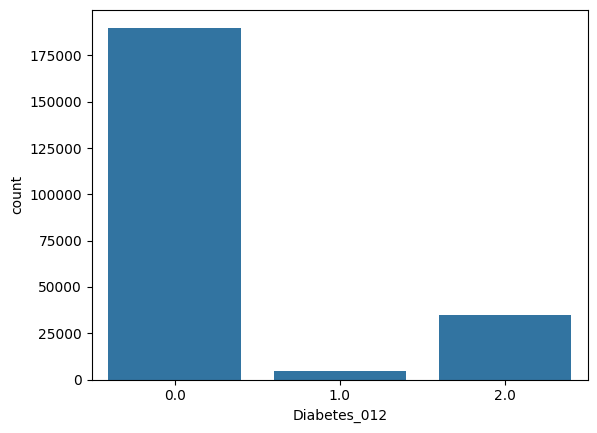

In [7]:
# Insight on the distribution of the dependent variable

sns.countplot(x='Diabetes_012', data=db)

The dataset shows a significant class imbalance in the target varaible, with most individuals classified as non-diabetic(0), a small minority as prediabetic(1), and a moderate number as diabetic(2). This imbalance which impact model performance will be be treated using the  SMOTE oversampling technique



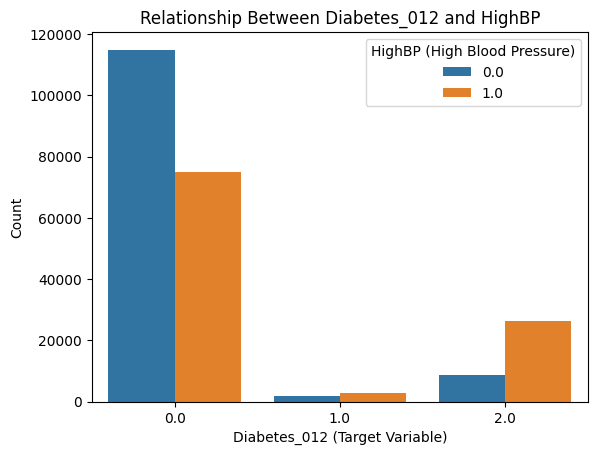

In [8]:
# Diabetes_012 vs HighBP
sns.countplot(x='Diabetes_012', hue='HighBP', data=db)
plt.title("Relationship Between Diabetes_012 and HighBP")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="HighBP (High Blood Pressure)", loc='upper right')
plt.show()

High blood pressure is prevalent across all groups but is more common among diabetic (2.0) and prediabetic (1.0) individuals than among non-diabetic (0.0) individuals, suggesting that hypertension is a significant risk factor contributing to the development and progression of diabetes

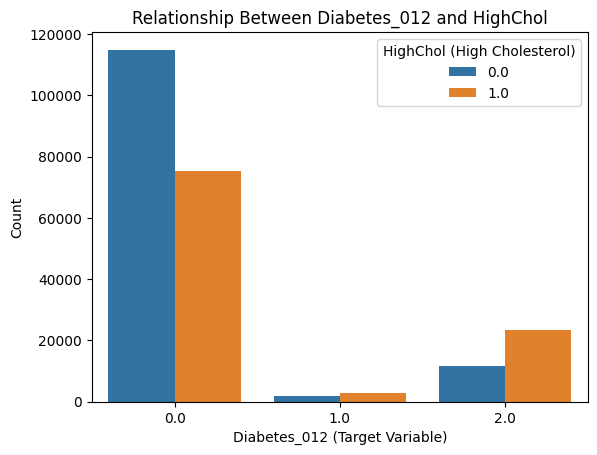

In [9]:
# Bivariate Analysis: Diabetes_012 vs HighChol
sns.countplot(x='Diabetes_012', hue='HighChol', data=db)
plt.title("Relationship Between Diabetes_012 and HighChol")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="HighChol (High Cholesterol)", loc='upper right')
plt.show()

High cholesterol is more common in diabetic (2.0) and prediabetic (1.0) individuals than in non-diabetic (0.0) individuals.
This indicates that high cholesterol may be a contributing factor to or a consequence of diabetes

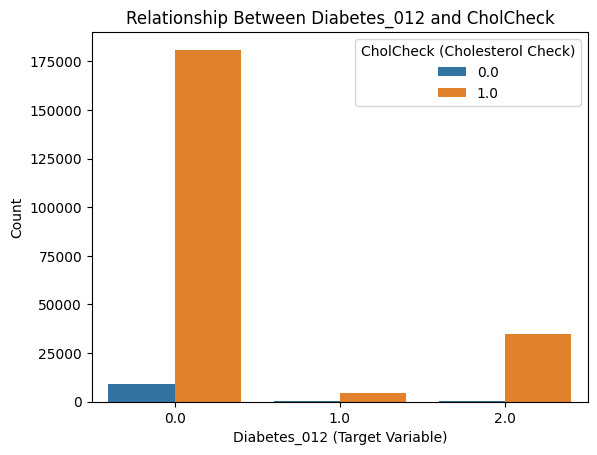

In [10]:
# Diabetes_012 vs CholCheck
sns.countplot(x='Diabetes_012', hue='CholCheck', data=db)
plt.title("Relationship Between Diabetes_012 and CholCheck")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="CholCheck (Cholesterol Check)", loc='upper right')
plt.show()

Cholesterol checks are highly prevalent across all groups, with the majority of individuals, including non-diabetic (0.0), prediabetic (1.0), and diabetic (2.0) individuals, undergoing regular monitoring (CholCheck = 1). This suggests widespread awareness of the importance of cholesterol monitoring

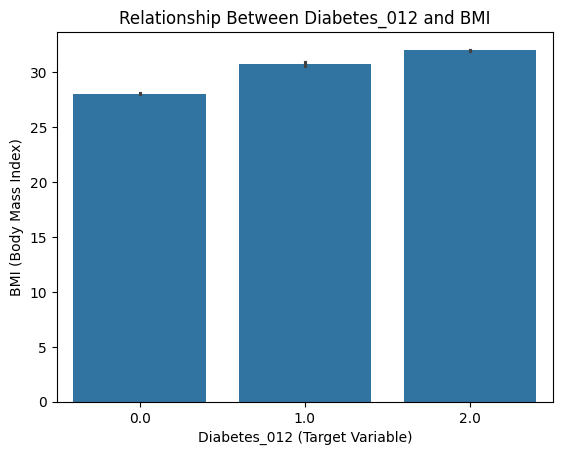

In [11]:
# Diabetes_012 vs BMI
sns.barplot(x='Diabetes_012', y='BMI', data=db)
plt.title("Relationship Between Diabetes_012 and BMI")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("BMI (Body Mass Index)")
plt.show()

The chart shows a positive correlation between BMI and diabetes progression. Individuals with diabetes (category 2) have the highest BMI, followed by those who are pre-diabetic (category 1), while non-diabetics (category 0) have the lowest BMI. This highlights the importance of weight management in preventing or mitigating the progression of diabetes

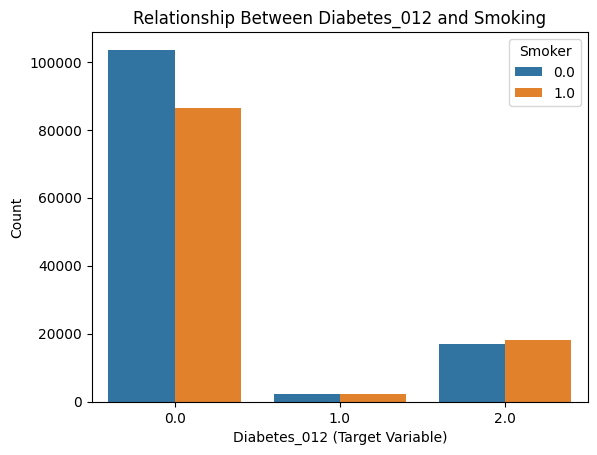

In [12]:
#  Diabetes_012 vs Smoker
sns.countplot(x='Diabetes_012', hue='Smoker', data=db)
plt.title("Relationship Between Diabetes_012 and Smoking")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="Smoker", loc='upper right')
plt.show()

The chart reveals that in the non-diabetics group the non-smokers slightly outnumber the  smokers. In the pre-diabetic and diabetic groups, smokers and non-smokers are nearly equally represented, suggesting that smoking might play a role in diabetes risk but is not the sole factor

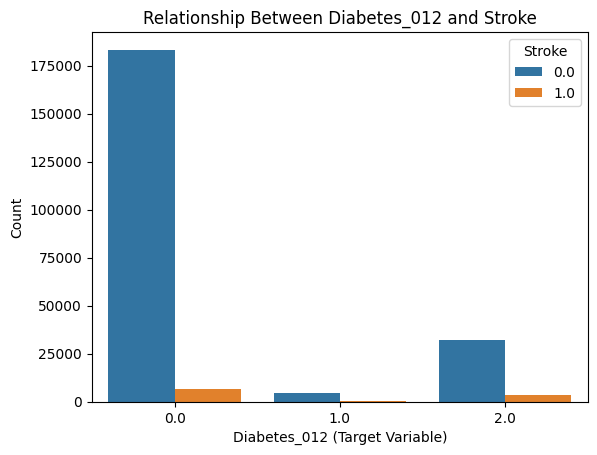

In [13]:
# Diabetes_012 vs Stroke
sns.countplot(x='Diabetes_012', hue='Stroke', data=db)
plt.title("Relationship Between Diabetes_012 and Stroke")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="Stroke", loc='upper right')
plt.show()

The chart shows that strokes are rare across all groups but are slightly more common among diabetics (category 2) compared to non-diabetics (category 0) and pre-diabetics (category 1). This suggests a potential link between diabetes progression and increased stroke risk, though strokes remain relatively uncommon overall.

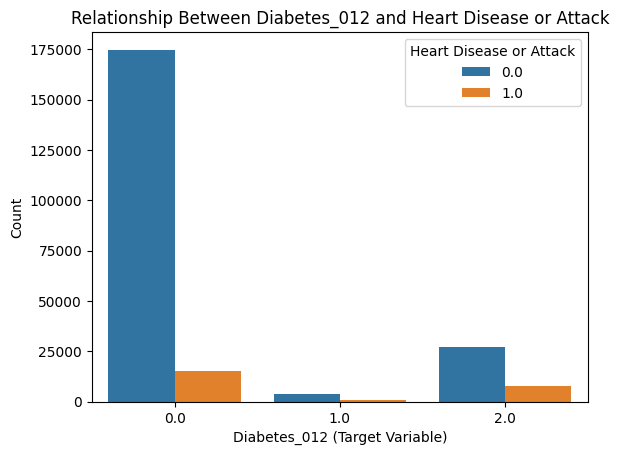

In [14]:
# Bivariate vs HeartDiseaseorAttack
sns.countplot(x='Diabetes_012', hue='HeartDiseaseorAttack', data=db)
plt.title("Relationship Between Diabetes_012 and Heart Disease or Attack")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="Heart Disease or Attack", loc='upper right')
plt.show()

The chart shows that heart disease or attacks are relatively rare across all groups but slightly more common in diabetics (category 2) compared to non-diabetics (category 0) and pre-diabetics (category 1). Most individuals, regardless of diabetes progression, do not have heart disease, though the data suggests an increasing risk of heart issues as diabetes progresses

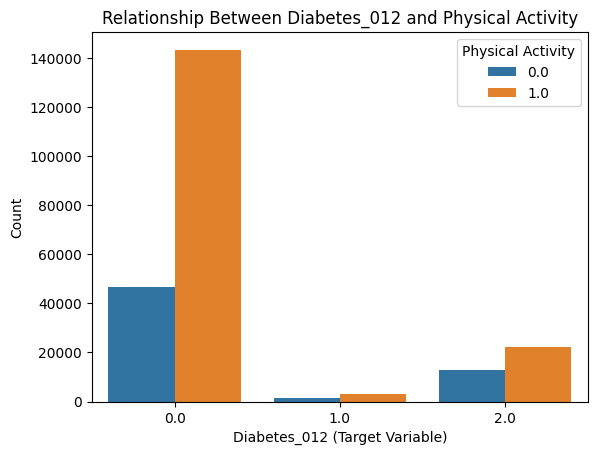

In [15]:
# Diabetes_012 vs PhysActivity
sns.countplot(x='Diabetes_012', hue='PhysActivity', data=db)
plt.title("Relationship Between Diabetes_012 and Physical Activity")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="Physical Activity", loc='upper right')
plt.show()

The chart shows that most individuals, particularly non-diabetics (category 0), engage in physical activity, as indicated by the large count for active individuals (1.0). However, among diabetics (category 2), the proportion of physically active individuals decreases, suggesting a potential link between lower physical activity levels and diabetes progression

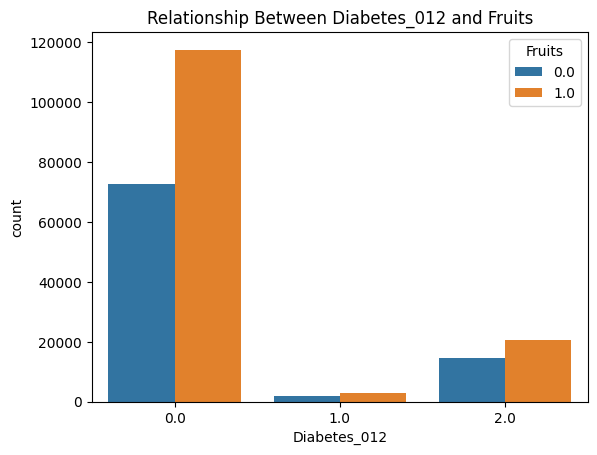

In [16]:
# Diabetes_012 vs Fruits
sns.countplot(x='Diabetes_012', hue='Fruits', data=db)
plt.title("Relationship Between Diabetes_012 and Fruits")
plt.show()


The chart illustrates the relationship between fruit and  consumption and diabetes progression. It shows that non-diabetics (category 0) are more likely to consume fruits (1.0), while diabetics (category 2) have a lower proportion of regular fruit  consumers. This suggests that a diet rich in fruits  may be associated with a lower risk of diabetes or its progression.

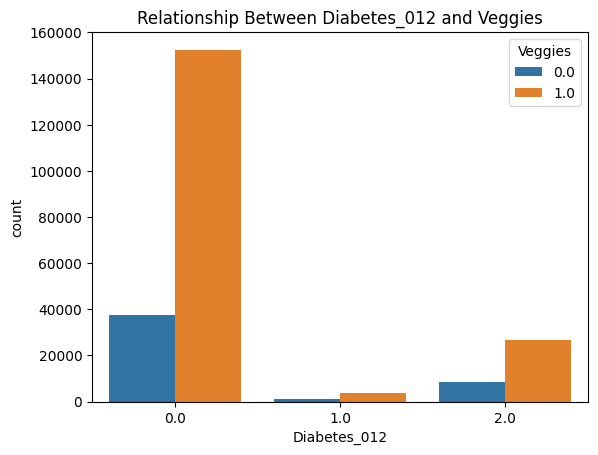

In [17]:
# Diabetes_012 vs Veggies
sns.countplot(x='Diabetes_012', hue='Veggies', data=db)
plt.title("Relationship Between Diabetes_012 and Veggies")
plt.show()

The chart shows that individuals who consume vegetables regularly (1.0) are predominantly non-diabetic (category 0), while diabetics (category 2) have a noticeably lower proportion of vegetable consumption. This suggests that regular vegetable intake may play a role in reducing the risk of diabetes or slowing its progression, highlighting the importance of a healthy diet in diabetes management.

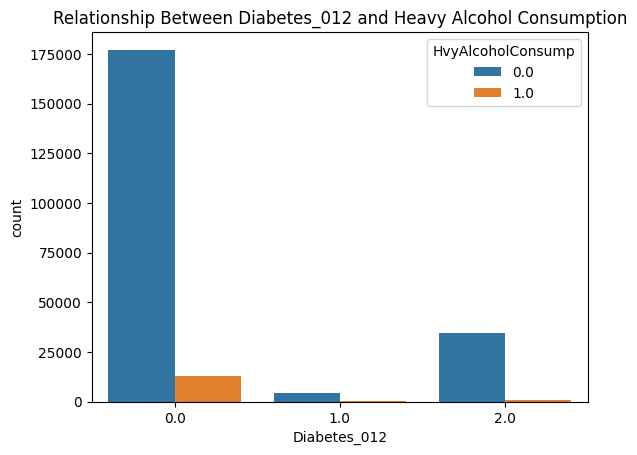

In [18]:
# Diabetes_012 vs Heavy Alcohol Consumption
sns.countplot(x='Diabetes_012', hue='HvyAlcoholConsump', data=db)
plt.title("Relationship Between Diabetes_012 and Heavy Alcohol Consumption")
plt.show()

The chart shows that heavy alcohol consumption (1.0) is relatively rare across all diabetes categories, with the majority of individuals, particularly non-diabetics (category 0), not engaging in heavy drinking. Among diabetics (category 2), heavy alcohol consumption is even less common. This suggests that heavy alcohol consumption is not a prevalent factor among diabetics

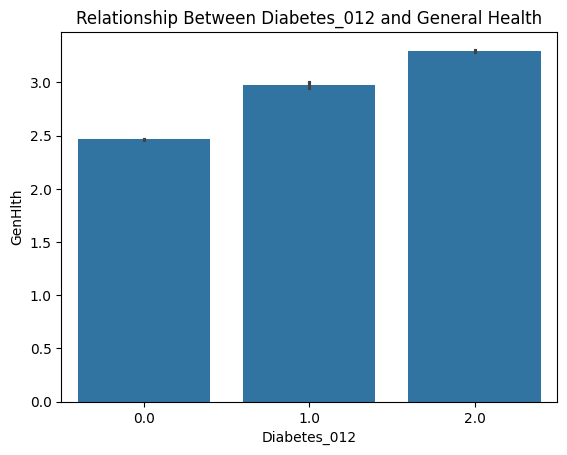

In [19]:
# Diabetes_012 vs General Health
sns.barplot(x='Diabetes_012', y='GenHlth', data=db)
plt.title("Relationship Between Diabetes_012 and General Health")
plt.show()

The chart shows a positive relationship between diabetes progression and general health ratings (GenHlth), with diabetics (category 2) reporting the poorest general health compared to pre-diabetics (category 1) and non-diabetics (category 0). This indicates that diabetes is associated with a decline in overall health.

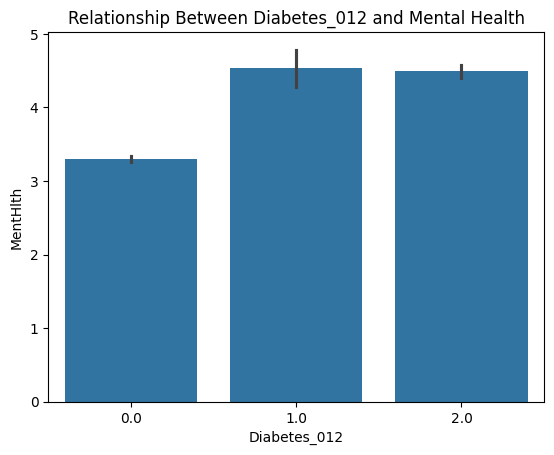

In [20]:
# Diabetes_012 vs Mental Health
sns.barplot(x='Diabetes_012', y='MentHlth', data=db)
plt.title("Relationship Between Diabetes_012 and Mental Health")
plt.show()

The chart shows that individuals with diabetes (categories 1 and 2) report worse mental health (MentHlth) compared to non-diabetics (category 0). The trend suggests a potential connection between diabetes progression and declining mental health, highlighting the importance of mental health support for individuals managing diabetes.

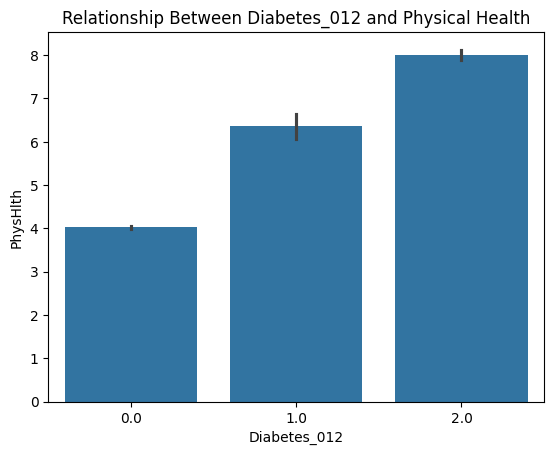

In [21]:
# Diabetes_012 vs Physical Health
sns.barplot(x='Diabetes_012', y='PhysHlth', data=db)
plt.title("Relationship Between Diabetes_012 and Physical Health")
plt.show()

The chart illustrates that individuals with diabetes (categories 1 and 2) report progressively poorer physical health (PhysHlth) compared to non-diabetics (category 0). Diabetics (category 2) experience the worst physical health, highlighting a clear association between diabetes progression and declining physical well-being.

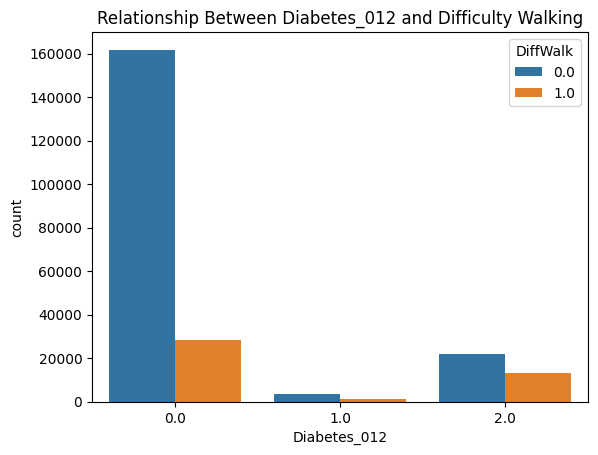

In [22]:
# Diabetes_012 vs Difficulty Walking
sns.countplot(x='Diabetes_012', hue='DiffWalk', data=db)
plt.title("Relationship Between Diabetes_012 and Difficulty Walking")
plt.show()

The chart indicates that individuals with diabetes (categories 1 and 2) are more likely to report difficulty walking (DiffWalk = 1) compared to non-diabetics (category 0). This association strengthens as diabetes progresses, with diabetics (category 2) showing a higher proportion of difficulty walking

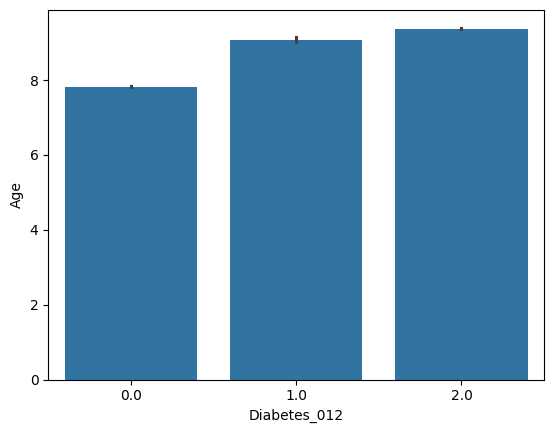

In [23]:
# Diabetes_012 vs  Age
sns.barplot(x='Diabetes_012', y='Age', data=db)
plt.show()

The chart shows that as diabetes progresses (from category 0 to 2), the average age of individuals increases. Diabetics (category 2) are older on average than non-diabetics (category 0) and pre-diabetics (category 1). This suggests that diabetes is more prevalent among older individuals, highlighting age as a potential risk factor for diabetes progression.

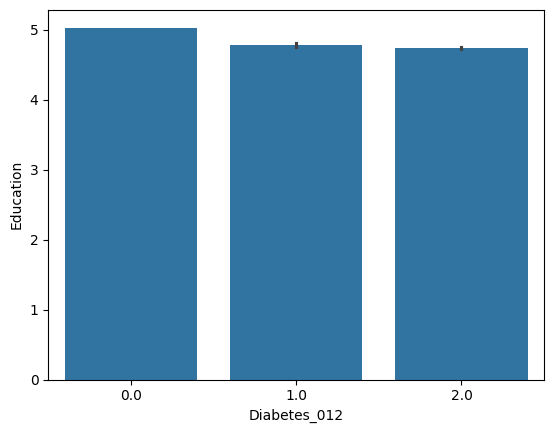

In [24]:
# Diabetes_012 vs Education
sns.barplot(x='Diabetes_012', y='Education', data=db)
plt.show()

The chart indicates that education levels are similar across all diabetes categories (0, 1, and 2), with no significant variation observed. This suggests that education level does not appear to have a strong direct association with diabetes progression in this dataset.

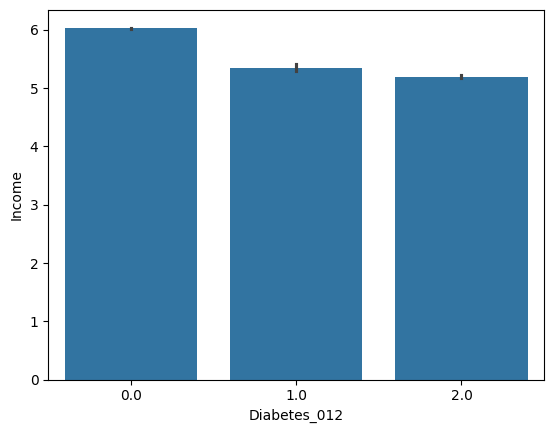

In [25]:
# Diabetes_012 vs Income
sns.barplot(x='Diabetes_012', y='Income', data=db)
plt.show()

The chart shows that income levels slightly decrease as diabetes progresses from non-diabetics (category 0) to diabetics (category 2). Individuals in the diabetic category have lower average income compared to non-diabetics. This suggests a potential association between lower income and higher diabetes prevalence.

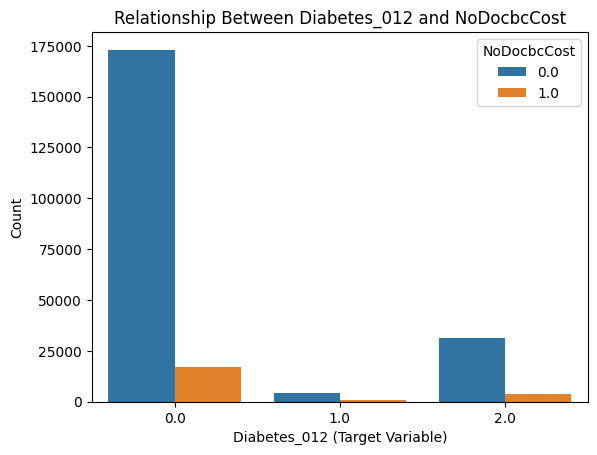

In [26]:
# Diabetes_012 vs NoDocbcCost
sns.countplot(x='Diabetes_012', hue='NoDocbcCost', data=db)
plt.title("Relationship Between Diabetes_012 and NoDocbcCost")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="NoDocbcCost", loc='upper right')
plt.show()

The chart shows that individuals in the diabetic categories (1 and 2) are slightly more likely to report "NoDocbcCost" (an inability to see a doctor due to cost) compared to non-diabetics (category 0). However, the overall prevalence of this issue remains low across all groups. This suggests that financial barriers to healthcare might slightly impact those with diabetes more,

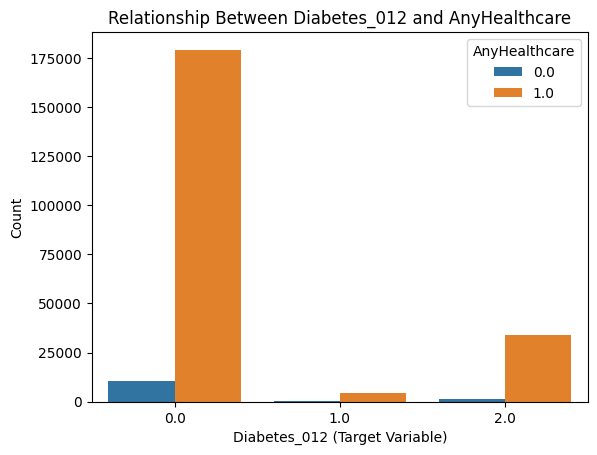

In [27]:
# Diabetes_012 vs AnyHealthcare
sns.countplot(x='Diabetes_012', hue='AnyHealthcare', data=db)
plt.title("Relationship Between Diabetes_012 and AnyHealthcare")
plt.xlabel("Diabetes_012 (Target Variable)")
plt.ylabel("Count")
plt.legend(title="AnyHealthcare", loc='upper right')
plt.show()


The chart shows that the majority of individuals across all diabetes categories (0, 1, and 2) report having access to healthcare (AnyHealthcare = 1). However, diabetics (category 2) have a slightly higher proportion of individuals without healthcare access (AnyHealthcare = 0) compared to non-diabetics (category 0).

Text(0.5, 1.0, 'Correlation Analysis')

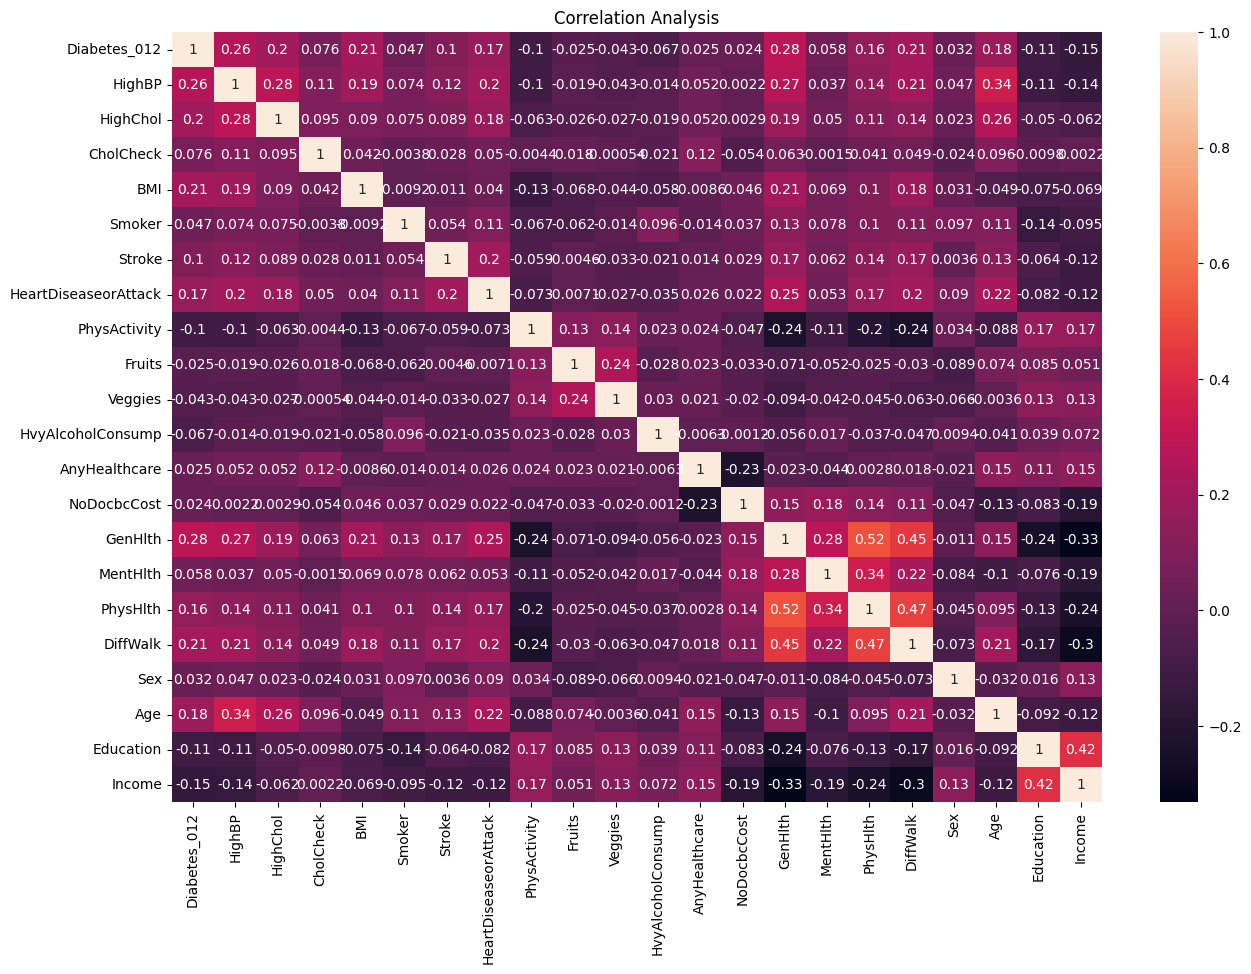

In [28]:
# Visualizing the correlation analysis to investigate relationship between the variables
plt.figure(figsize=(15,10))
sns.heatmap(db.corr(), annot=True)
plt.title("Correlation Analysis")

The correlation analysis reveals that diabetes progression (Diabetes_012) is strongly linked to several health conditions and demographic factors. It is positively correlated with high blood pressure (0.26) and high cholesterol (0.28), indicating that individuals with diabetes are more likely to experience these conditions. Age also shows a strong positive correlation (0.34) with diabetes, suggesting that older individuals are more prone to the disease. Conversely, negative correlations with income (-0.15) and education (-0.11) point to a possible socioeconomic connection, where lower income and education levels may contribute to higher diabetes prevalence.

Health and lifestyle factors also play a significant role. Higher BMI is moderately associated with high blood pressure (0.19) and high cholesterol (0.18), emphasizing the impact of obesity on these conditions. Physical activity, on the other hand, negatively correlates with diabetes progression (-0.10), suggesting that an active lifestyle reduces diabetes risk. Furthermore, fruit and vegetable consumption is positively linked to physical activity (0.13 and 0.14), indicating that individuals with healthier lifestyles tend to have better diets.

Mental and physical health indicators reveal critical insights into overall well-being. General health is strongly correlated with physical health (0.52), and difficulty walking (DiffWalk) has strong positive correlations with both general health (0.45) and physical health (0.47). These findings highlight how poor physical and general health are linked to mobility issues. Socioeconomic factors also show a moderate positive relationship between income and education (0.42), while both are weakly negatively correlated with diabetes, high blood pressure, and high cholesterol, underscoring their protective influence on health outcomes.

### Preparing and Preprocessing the Data

In [29]:
# Splitting  the data into target and independent variable
X=db.drop(['Diabetes_012'], axis=1)
y= db['Diabetes_012']

In [30]:
# Ensuring the data is balanced using smote technique so there is no bias in the model

# Initializing the sampling object
sm=over_sampling.SMOTE()

# Applying the sampling to the dataset
X,y=sm.fit_resample(X,y)

<Axes: xlabel='Diabetes_012', ylabel='count'>

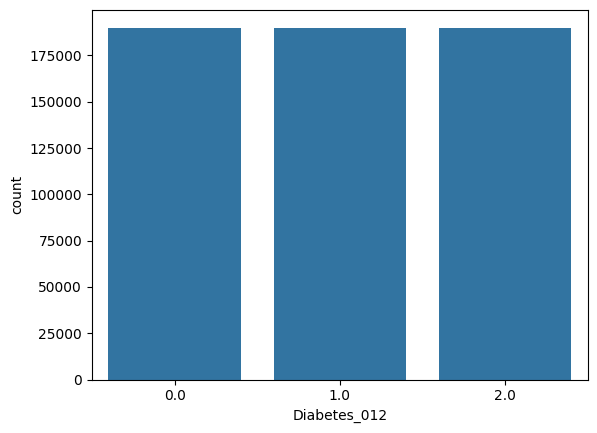

In [31]:
# Checking the data after applying the SMOTE

sns.countplot(x=y, data=db)


In [32]:
# Checking the total number of rows  after applying the SMOTE
X.shape

(570165, 21)

In [33]:
# Train-test split using the 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
# Normalizing the features by scaling them to be within the same scale
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Model Building

Next step, I will now be employing the 3 algorithims to build the models as well as evaluating the performance of the model built



#### Building the Random Forest Model



In [35]:
# Objectifying the Random Forest Model
random=RandomForestClassifier(random_state=42)

# Fitting the Random Forest Model  to learn  the training data
random.fit(x_train_scaled,y_train)

# How well did the Random model learn the data
train_random_accuracy =random.score(x_train_scaled,y_train)

# Making prediction on the test data
random_prediction = random.predict(x_test_scaled)

train_random_accuracy


0.9962905474730999

#### Evaluating the performnace of the Random Forest model  on test data

In [36]:
# Evaluating the Random model prediction on test data
test_random_accuracy=metrics.accuracy_score(y_test, random_prediction)

classification_random_report = metrics.classification_report(y_test, random_prediction)

random_confusion_matrix = metrics.confusion_matrix(y_test, random_prediction)

test_random_accuracy

0.9215051783255724

In [37]:
print(classification_random_report)


              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     38064
         1.0       0.98      0.96      0.97     37977
         2.0       0.93      0.86      0.89     37992

    accuracy                           0.92    114033
   macro avg       0.92      0.92      0.92    114033
weighted avg       0.92      0.92      0.92    114033



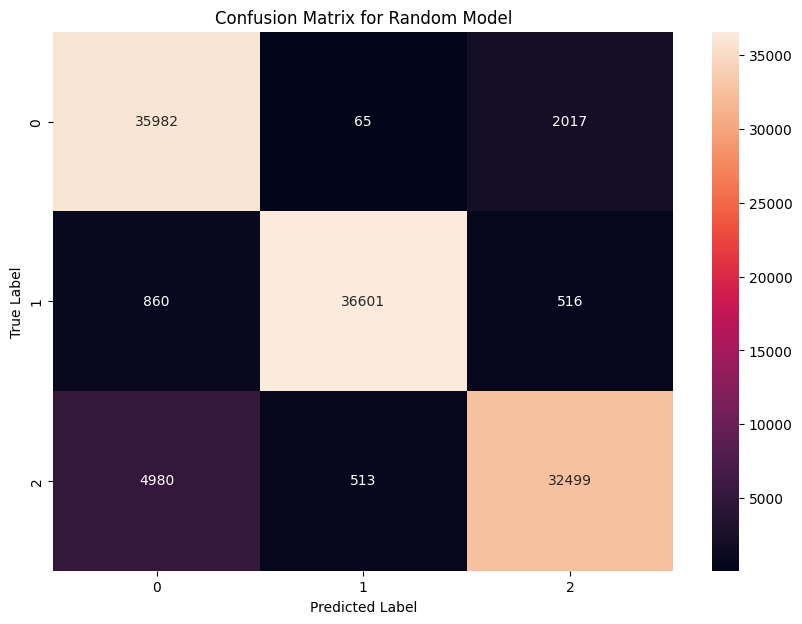

In [38]:
# Visualizing  the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(random_confusion_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix for Random Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Building the XgBoost Model

In [39]:
# Objectifying the Xgboost Model

xg=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fitting the Xgboost Model  to learn  the training data
xg.fit(x_train_scaled,y_train)

# How well did the Xgboost Model learn the data
train_xg_accuracy = xg.score(x_train_scaled,y_train)

# Making prediction on the test data
xg_prediction = xg.predict(x_test_scaled)

print(train_xg_accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:23:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.8374746783825735


#### Evaluating the performnace of the Xgboost model  on test data

In [40]:
# Evaluating the Xgboost model prediction on test data
test_xg_accuracy=metrics.accuracy_score(y_test, xg_prediction)

classification_xg_report = metrics.classification_report(y_test, xg_prediction)

xg_confusion_matrix = metrics.confusion_matrix(y_test, xg_prediction)

print(test_xg_accuracy)

0.8265414397586663


In [41]:
print(classification_xg_report)


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     38064
         1.0       0.81      0.86      0.84     37977
         2.0       0.82      0.65      0.73     37992

    accuracy                           0.83    114033
   macro avg       0.83      0.83      0.82    114033
weighted avg       0.83      0.83      0.82    114033



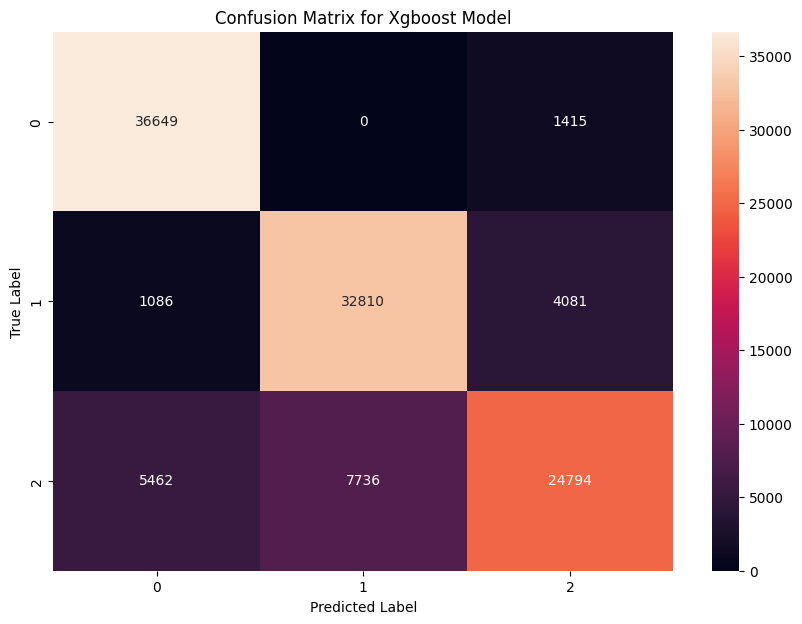

In [42]:
# Visualizing  the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(xg_confusion_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix for Xgboost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Building the Support Vector Model

In [43]:
# Objectifying the Support Vector Model
support=LinearSVC(random_state=42)

# Fitting the Model  to learn  the training data
support.fit(x_train_scaled,y_train)

# How well did the model learn the data
train_support_accuracy =support.score(x_train_scaled,y_train)

# Making prediction on the test data
support_prediction =support.predict(x_test_scaled)

print(train_support_accuracy)

0.5150416984557102


#### Evaluating the performnace of the Support model  on test data


In [44]:
# Evaluating the model prediction on test data
test_support_accuracy=metrics.accuracy_score(y_test, support_prediction)

classification_support_report = metrics.classification_report(y_test, support_prediction)

support_confusion_matrix = metrics.confusion_matrix(y_test, support_prediction)

print(test_support_accuracy)

0.5156489788043812


In [45]:
print(classification_support_report)


              precision    recall  f1-score   support

         0.0       0.57      0.67      0.62     38064
         1.0       0.44      0.24      0.31     37977
         2.0       0.50      0.64      0.56     37992

    accuracy                           0.52    114033
   macro avg       0.50      0.52      0.49    114033
weighted avg       0.50      0.52      0.49    114033



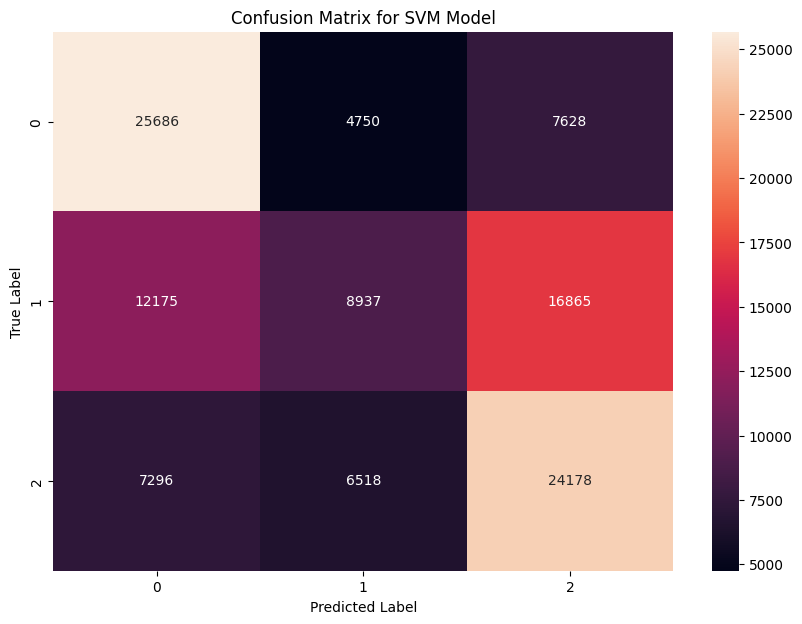

In [46]:
# Visualizing  the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(support_confusion_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()